<a href="https://colab.research.google.com/github/ybing86-lang/MSSP6070/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import ttest_ind

In [3]:
from google.colab import files
uploaded = files.upload()

Saving InternetSales (3).csv to InternetSales (3).csv


In [4]:
df = pd.read_csv("/content/InternetSales (3).csv", encoding='latin-1', dtype={'CustomerAlternateKey': object})
df.head()

/tmp/ipython-input-2112893352.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/InternetSales (3).csv", encoding='latin-1', dtype={'CustomerAlternateKey': object})


,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,1/19/2011,1/31/2011,1/26/2011
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,5/3/2013,5/15/2013,5/10/2013
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,5/3/2013,5/15/2013,5/10/2013


In [5]:
df.shape

(60398, 60)

In [6]:
df.columns = df.columns.str.strip()
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")
df["YearlyIncome"] = pd.to_numeric(df["YearlyIncome"], errors="coerce")
df["OrderQuantity"] = pd.to_numeric(df["OrderQuantity"], errors="coerce")
df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors="coerce")
df['SalesAmount'] = pd.to_numeric(df['SalesAmount'], errors='coerce')
df['Year'] = (pd.to_numeric(df['OrderDateKey'], errors='coerce') // 10000)
df["HouseOwnerFlag"] = df["HouseOwnerFlag"].map({1: "Owner", 0: "Renter"})
cols = [
    "Year", "EnglishCountryRegionName", "SalesAmount",
    "EnglishProductName", "OrderQuantity", "UnitPrice",
    "YearlyIncome", "Gender", "HouseOwnerFlag"
]
data = df[cols].copy()
data = data.dropna(subset=cols)

In [7]:
cols = [
    "Year", "EnglishCountryRegionName", "SalesAmount", "EnglishProductName",
    "OrderQuantity", "UnitPrice", "YearlyIncome", "Gender", "HouseOwnerFlag", "TotalProductCost"
]
data = df[cols].copy()
data = data.dropna(subset=cols)

In [8]:
grouped = data.groupby(["Year", "EnglishCountryRegionName"])
sales_sum = grouped["SalesAmount"].sum()
sales_by_year_country = sales_sum.reset_index()
sales_by_year_country = sales_by_year_country.sort_values(
    by=["Year", "SalesAmount"], ascending=[True, False]
     )
pd.options.display.float_format = '{:,.2f}'.format
sales_by_year_country.head(10)

,Year,EnglishCountryRegionName,SalesAmount
0,2010,Australia,"20,909.78"
4,2010,United States,"14,833.90"
1,2010,Canada,"3,578.27"
2,2010,France,"3,399.99"
3,2010,United Kingdom,699.10
5,2011,Australia,"2,563,732.25"
10,2011,United States,"2,458,285.17"
6,2011,Canada,"571,571.80"
9,2011,United Kingdom,"550,591.22"
8,2011,Germany,"520,500.16"


In [9]:
df['EnglishCountryRegionName'].unique()

array(['Australia', 'United States', 'Canada', 'Germany',
       'United Kingdom', 'France'], dtype=object)

In [10]:
df['Year'].min(), df['Year'].max()

(2010, 2014)

In [11]:
sales_pivot = sales_by_year_country.pivot(
    index='Year',
    columns='EnglishCountryRegionName',
    values='SalesAmount'
)

sales_pivot

EnglishCountryRegionName,Australia,Canada,France,Germany,United Kingdom,United States
Year,,,,,,
2010,"20,909.78","3,578.27","3,399.99",NaN,699.10,"14,833.90"
2011,"2,563,732.25","571,571.80","410,845.33","520,500.16","550,591.22","2,458,285.17"
2012,"2,128,407.46","307,604.52","648,065.54","608,657.98","712,700.96","1,437,048.73"
2013,"4,339,443.38","1,085,632.65","1,578,511.80","1,761,876.36","2,124,007.29","5,462,078.86"
2014,"8,507.72","9,457.62","3,195.06","3,277.83","3,713.64","17,542.85"


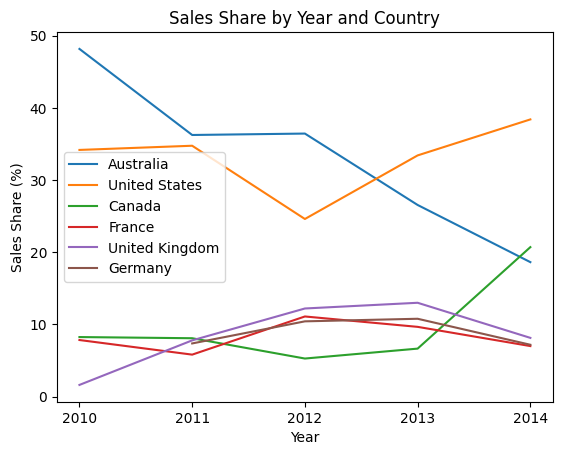

In [12]:
year_total_sales = sales_by_year_country.groupby("Year")["SalesAmount"].sum().rename("TotalSales")
sales_share_table = sales_by_year_country.merge(year_total_sales, on="Year")
sales_share_table["SalesSharePercent"] = (
    sales_share_table["SalesAmount"] / sales_share_table["TotalSales"] * 100
)
for country in sales_share_table['EnglishCountryRegionName'].unique():
    country_data = sales_share_table[sales_share_table['EnglishCountryRegionName'] == country]
    plt.plot(country_data['Year'], country_data['SalesSharePercent'], label=country)

plt.title("Sales Share by Year and Country")
plt.xlabel("Year")
plt.ylabel("Sales Share (%)")
plt.xticks(sorted(sales_share_table['Year'].unique()))
plt.legend()
plt.savefig("/content/salesshare.png", dpi=300, bbox_inches="tight")
plt.show()

In [13]:
income_stats = data.groupby(["EnglishCountryRegionName", "Gender"])["YearlyIncome"].agg(["count", "min", "max", "mean", "std"]).reset_index()
pd.options.display.float_format = '{:,.2f}'.format
income_stats.to_csv("/content/income_by_gender_country.csv")
income_stats

,EnglishCountryRegionName,Gender,count,min,max,mean,std
0,Australia,F,6685,10000,160000,"67,060.58","30,613.96"
1,Australia,M,6660,10000,170000,"65,412.91","32,550.78"
2,Canada,F,3648,10000,170000,"58,651.32","19,435.16"
3,Canada,M,3972,10000,170000,"61,460.22","22,702.85"
4,France,F,2781,10000,110000,"39,367.13","28,421.84"
5,France,M,2777,10000,110000,"39,805.55","28,665.66"
6,Germany,F,2820,10000,130000,"48,287.23","37,622.81"
7,Germany,M,2805,10000,130000,"46,730.84","37,487.62"
8,United Kingdom,F,3401,10000,170000,"56,518.67","51,130.69"
9,United Kingdom,M,3505,10000,170000,"55,771.75","50,963.71"


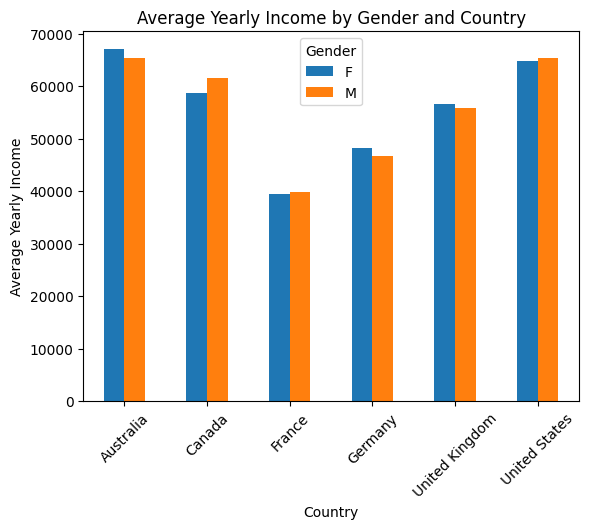

In [14]:
income_table = income_stats.pivot_table(
    index="EnglishCountryRegionName",
    columns="Gender",
    values="mean"
)
income_table.plot(kind="bar")
plt.title("Average Yearly Income by Gender and Country")
plt.xlabel("Country")
plt.ylabel("Average Yearly Income")
plt.xticks(rotation=45)
plt.savefig("/content/income_by_gender_country.png", dpi=300, bbox_inches="tight")
plt.show()

In [15]:
df_t = data[["EnglishCountryRegionName", "Gender", "YearlyIncome"]].dropna()
for country in df_t["EnglishCountryRegionName"].unique():
    male_income = df_t[(df_t["EnglishCountryRegionName"] == country) & (df_t["Gender"] == "M")]["YearlyIncome"]
    female_income = df_t[(df_t["EnglishCountryRegionName"] == country) & (df_t["Gender"] == "F")]["YearlyIncome"]
    t_stat, p_val = ttest_ind(male_income, female_income, equal_var=False)
    print(f"{country}: t={t_stat:.3f}, p={p_val:.4f}")

Australia: t=-3.012, p=0.0026
United States: t=1.919, p=0.0550
Canada: t=5.815, p=0.0000
Germany: t=-1.554, p=0.1202
United Kingdom: t=-0.608, p=0.5433
France: t=0.573, p=0.5670


In [16]:
dfsales = data[["EnglishProductName", "OrderQuantity", "UnitPrice", "SalesAmount", "TotalProductCost"]].dropna()
results = dfsales.groupby("EnglishProductName").agg({
    "OrderQuantity": "sum",
    "UnitPrice": "mean",
    "SalesAmount": "sum",
    "TotalProductCost": "sum"
}).reset_index()
results["Profit"] = results["SalesAmount"] - results["TotalProductCost"]
results["AvgPrice"] = results["SalesAmount"] / results["OrderQuantity"]
results = results.sort_values(by="Profit", ascending=False)
results

,EnglishProductName,OrderQuantity,UnitPrice,SalesAmount,TotalProductCost,Profit,AvgPrice
34,"Mountain-200 Black, 46",620,"2,215.27","1,373,469.55","746,847.97","626,621.57","2,215.27"
33,"Mountain-200 Black, 42",614,"2,220.10","1,363,142.09","741,382.49","621,759.61","2,220.10"
35,"Mountain-200 Silver, 38",596,"2,247.42","1,339,462.79","728,598.36","610,864.43","2,247.42"
37,"Mountain-200 Silver, 46",580,"2,243.28","1,301,100.10","707,609.63","593,490.47","2,243.28"
32,"Mountain-200 Black, 38",582,"2,224.86","1,294,866.14","704,388.68","590,477.46","2,224.86"
...,...,...,...,...,...,...,...
52,Patch Kit/8 Patches,3191,2.29,"7,307.39","2,733.09","4,574.30",2.29
0,AWC Logo Cap,2190,8.99,"19,688.10","15,159.84","4,528.26",8.99
2,Bike Wash - Dissolver,908,7.95,"7,218.60","2,699.76","4,518.84",7.95
54,"Racing Socks, M",298,8.99,"2,679.02","1,001.97","1,677.05",8.99


In [17]:
results.to_csv("/content/Q3_Product_Sales_Profit.csv", index=False)
top10 = results.head(10)
top10.to_csv("/content/Q3_Top10_Products.csv", index=False)
top10

,EnglishProductName,OrderQuantity,UnitPrice,SalesAmount,TotalProductCost,Profit,AvgPrice
34,"Mountain-200 Black, 46",620,"2,215.27","1,373,469.55","746,847.97","626,621.57","2,215.27"
33,"Mountain-200 Black, 42",614,"2,220.10","1,363,142.09","741,382.49","621,759.61","2,220.10"
35,"Mountain-200 Silver, 38",596,"2,247.42","1,339,462.79","728,598.36","610,864.43","2,247.42"
37,"Mountain-200 Silver, 46",580,"2,243.28","1,301,100.10","707,609.63","593,490.47","2,243.28"
32,"Mountain-200 Black, 38",582,"2,224.86","1,294,866.14","704,388.68","590,477.46","2,224.86"
36,"Mountain-200 Silver, 42",560,"2,245.42","1,257,434.57","683,922.64","573,511.94","2,245.42"
58,"Road-150 Red, 48",337,"3,578.27","1,205,876.99","731,726.15","474,150.84","3,578.27"
61,"Road-150 Red, 62",336,"3,578.27","1,202,298.72","729,554.85","472,743.87","3,578.27"
59,"Road-150 Red, 52",302,"3,578.27","1,080,637.54","655,730.85","424,906.69","3,578.27"
60,"Road-150 Red, 56",295,"3,578.27","1,055,589.65","640,531.79","415,057.86","3,578.27"


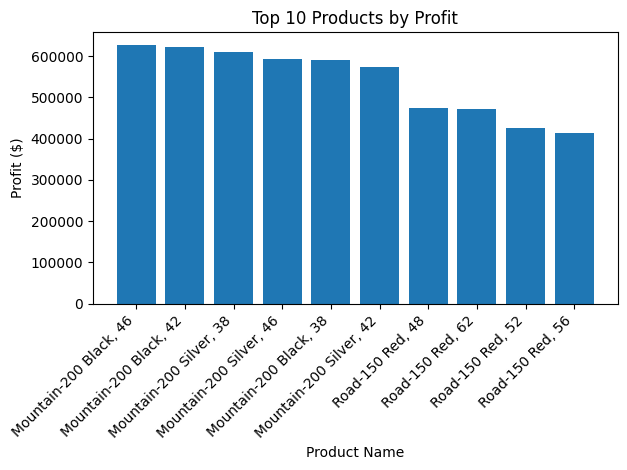

In [18]:
plt.bar(top10["EnglishProductName"], top10["Profit"])
plt.title("Top 10 Products by Profit")
plt.xlabel("Product Name")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("/content/Q3_Top10_Products_Profit.png", dpi=300, bbox_inches="tight")
plt.show()

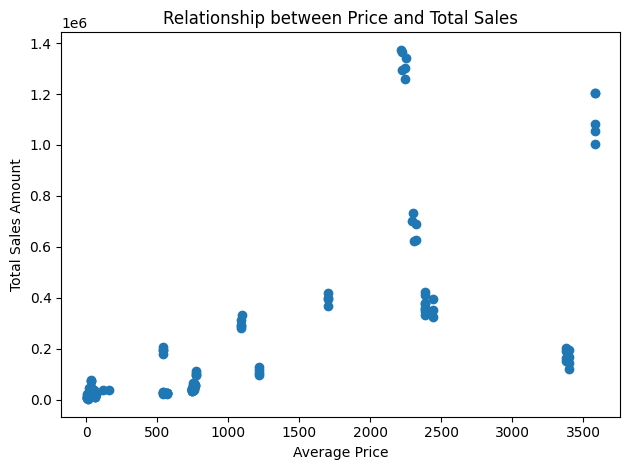

In [19]:
plt.scatter(results["AvgPrice"], results["SalesAmount"])
plt.xlabel("Average Price")
plt.ylabel("Total Sales Amount")
plt.title("Relationship between Price and Total Sales")
plt.tight_layout()
plt.savefig("/content/Q3_Price_vs_Sales.png", dpi=300, bbox_inches="tight")
plt.show()

In [20]:
sales_by_home = data.groupby("HouseOwnerFlag")["SalesAmount"].agg(["count", "mean", "std"]).reset_index()
sales_by_home.columns = ["HouseOwnerFlag", "Count", "AvgSales", "StdDev"]
sales_by_home.to_csv("/content/Q4_Sales_by_Homeownership.csv", index=False)
sales_by_home

,HouseOwnerFlag,Count,AvgSales,StdDev
0,Owner,41699,488.87,930.12
1,Renter,18699,479.88,924.84


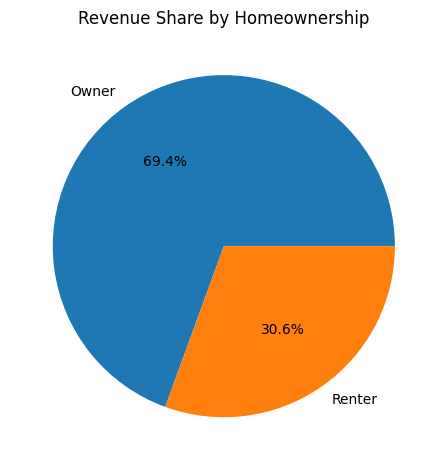

In [21]:
rev = data.groupby("HouseOwnerFlag")["SalesAmount"].sum().reset_index()
rev["SharePct"] = rev["SalesAmount"] / rev["SalesAmount"].sum() * 100
rev.to_csv("/content/Q4_revenue_share.csv", index=False)

plt.figure()
plt.pie(rev["SalesAmount"], labels=rev["HouseOwnerFlag"], autopct="%1.1f%%")
plt.title("Revenue Share by Homeownership")
plt.tight_layout()
plt.savefig("/content/Figure6_Revenue_Share_by_Homeownership.png")
plt.show()

In [22]:
q4_products = data[["HouseOwnerFlag","EnglishProductName","SalesAmount","UnitPrice"]].dropna()
product_sales_home = (
    q4_products.groupby(["HouseOwnerFlag","EnglishProductName"], as_index=False)
    .agg(
        TotalSales=("SalesAmount","sum"),
        AvgUnitPrice=("UnitPrice","mean")
    )
)
owner_top3 = product_sales_home.query("HouseOwnerFlag == 'Owner'").nlargest(3, "TotalSales")
renter_top3 = product_sales_home.query("HouseOwnerFlag == 'Renter'").nlargest(3, "TotalSales")
top3_compare = pd.concat([
    owner_top3.assign(Group="Owner"),
    renter_top3.assign(Group="Renter")
])[["Group","EnglishProductName","TotalSales","AvgUnitPrice"]]
top3_compare.to_csv("/content/Q4_Top3_Products_with_AvgPrice.csv", index=False)
top3_compare

,Group,EnglishProductName,TotalSales,AvgUnitPrice
34,Owner,"Mountain-200 Black, 46","1,022,745.90","2,223.36"
35,Owner,"Mountain-200 Silver, 38","1,003,892.81","2,250.88"
33,Owner,"Mountain-200 Black, 42","972,174.15","2,224.65"
167,Renter,"Mountain-200 Silver, 46","406,661.10","2,222.19"
163,Renter,"Mountain-200 Black, 42","390,967.94","2,208.86"
164,Renter,"Mountain-200 Black, 46","350,723.65","2,192.02"
